# Data Exploration

This is notebook is not meant for **nice** visualizations but rather for basic understanding of the data distribution and possible features. Feel free to make changes / add stuff / make your own version in a different notebook.

### TODO:
- Clean and process categorical values
- Improve readablity of visualizations
- Visualize all important columns

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('../data/cleaned_dataset.csv')

# List the column names
column_names = df.columns.tolist()

# Display the column names
print("Column names:")
print(column_names)

print(df.info())
print(df.head())

Column names:
['id', 'name', 'description', 'host_since', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month', 'availability_365']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36389 entries, 0 to 36388
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           36389 non-null  object 
 1   name                         36389 non-null  object 
 2   description   

/var/folders/ff/c5x2gj2j2h9_c60nkh46tbhm0000gn/T/ipykernel_18272/1245315261.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/cleaned_dataset.csv')


## Missing values

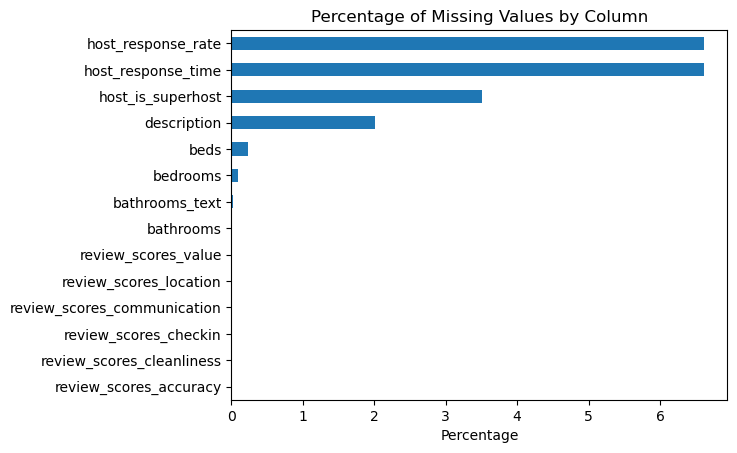

In [13]:
missing_values = df.isnull().mean() * 100
missing_values[missing_values > 0].sort_values().plot(kind='barh')
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Percentage")
plt.show()

## Target variable

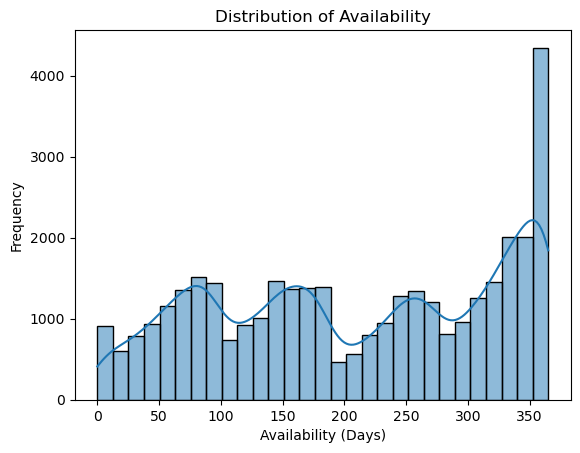

In [14]:
sns.histplot(df['availability_365'], kde=True)
plt.title("Distribution of Availability")
plt.xlabel("Availability (Days)")
plt.ylabel("Frequency")
plt.show()

## Other variables

TODO: finish data exploration for all important columns

### Numerical columns

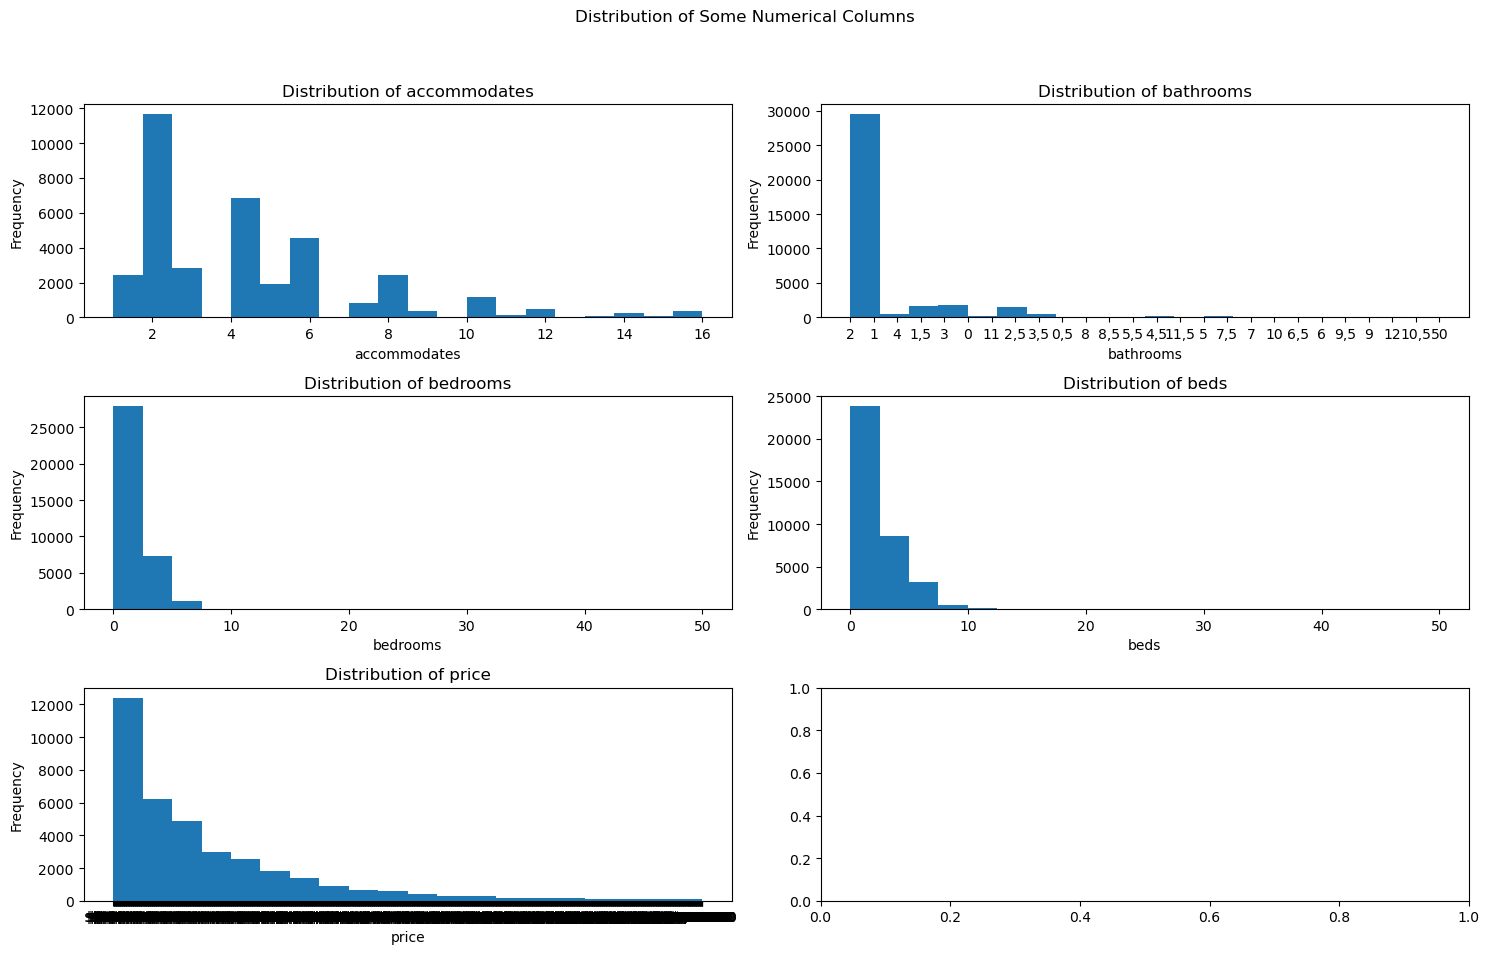

In [30]:
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col].dropna(), bins=20)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")


plt.suptitle("Distribution of Some Numerical Columns")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Categorical columns

/var/folders/ff/c5x2gj2j2h9_c60nkh46tbhm0000gn/T/ipykernel_18272/2360896009.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ff/c5x2gj2j2h9_c60nkh46tbhm0000gn/T/ipykernel_18272/2360896009.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/ff/c5x2gj2j2h9_c60nkh46tbhm0000gn/T/ipykernel_18272/2360896009.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


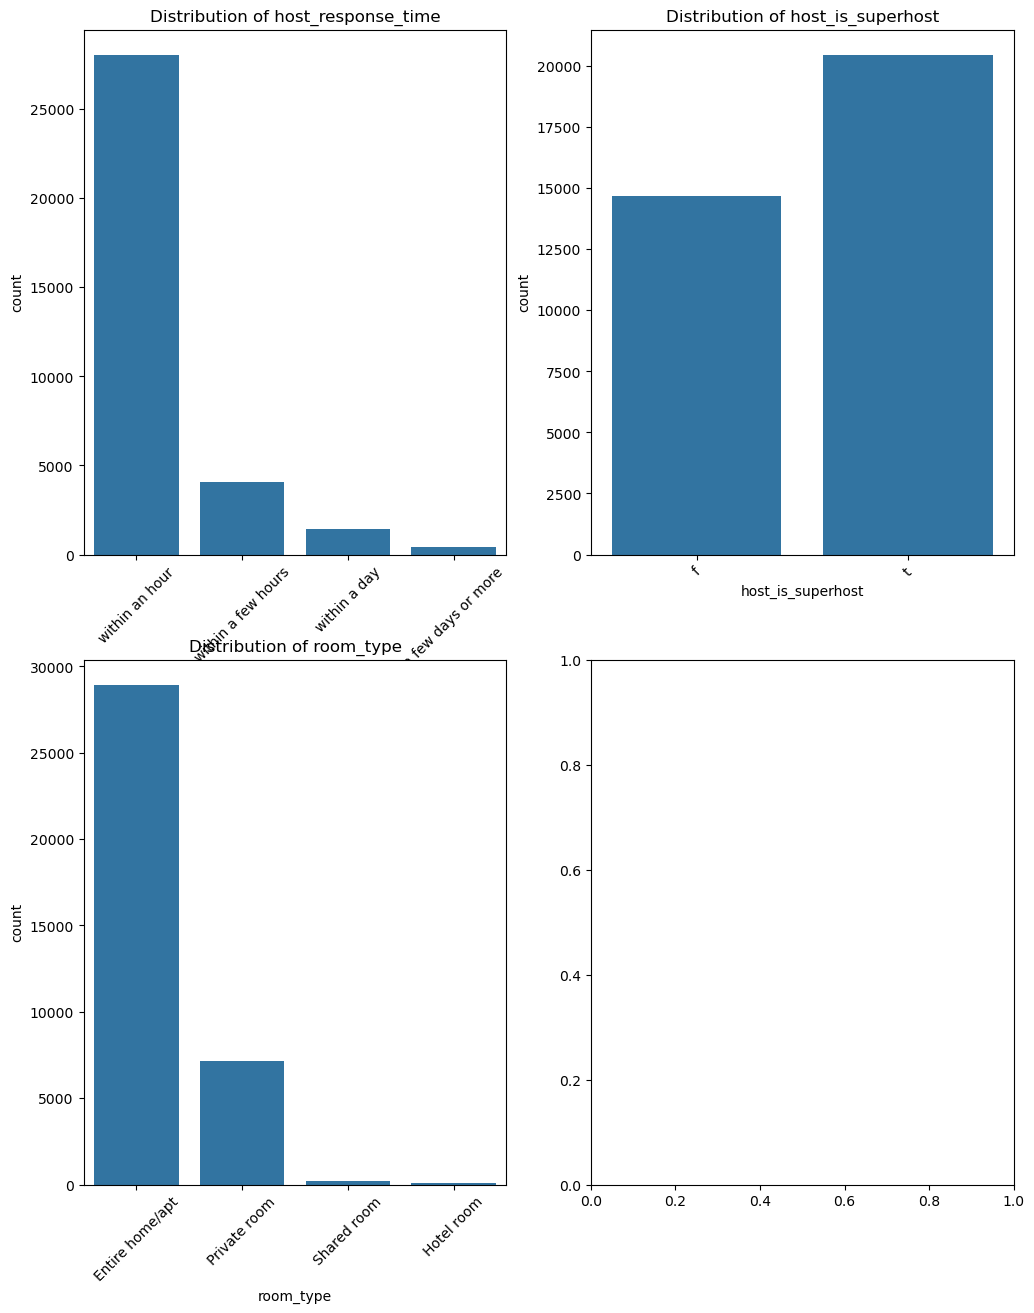

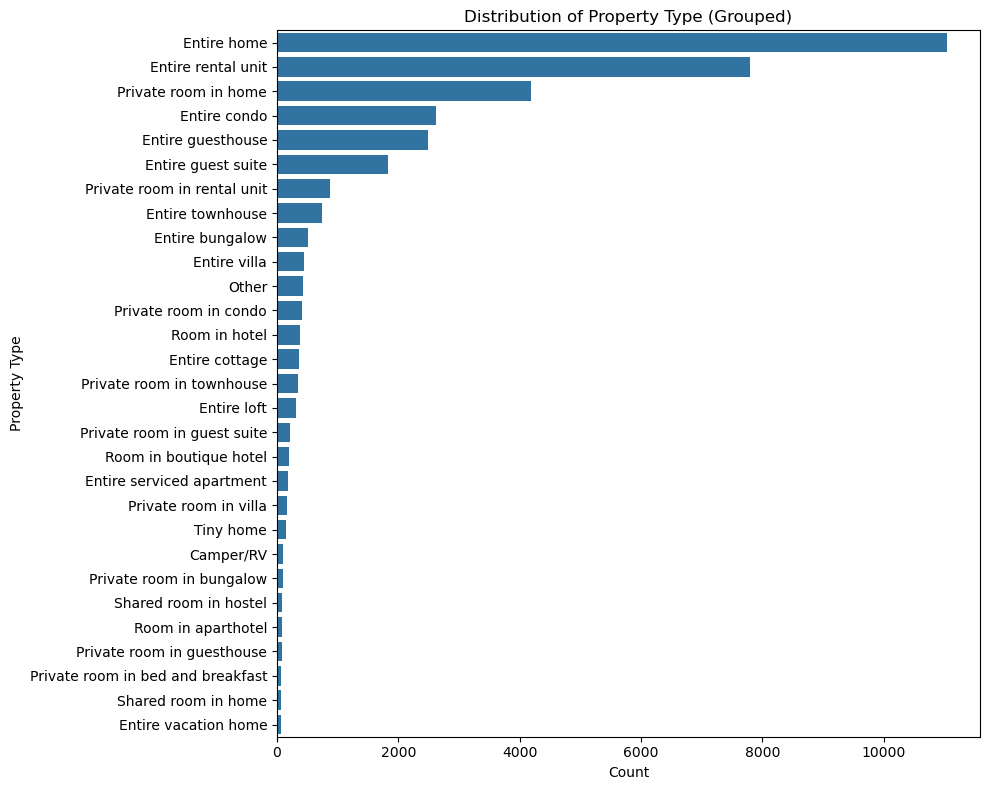

In [29]:
categorical_cols = ['host_response_time', 'host_is_superhost', 'room_type']
fig, axes = plt.subplots(2, 2, figsize=(12, 15))
for col, ax in zip(categorical_cols, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Grouping rare property types into "Other"
df['property_type'] = df['property_type'].apply(lambda x: x if df['property_type'].value_counts()[x] > 50 else 'Other')

plt.figure(figsize=(10, 8))
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index)
plt.title("Distribution of Property Type (Grouped)")
plt.xlabel("Count")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()

## Correlation

In [31]:
dfp = pd.read_csv('../data/processed_data.csv')
print(dfp.dtypes)


host_since                  int64
host_response_rate        float64
host_is_superhost         float64
host_has_profile_pic        int64
host_identity_verified      int64
latitude                  float64
longitude                 float64
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                     float64
instant_bookable            int64
availability_365            int64
shared_bathroom             int64
dtype: object


In [32]:

# Check for object type columns. There should be none 
object_columns = dfp.select_dtypes(include=['object']).columns.tolist()
dfp = dfp.drop(columns=object_columns)

print("Columns of type object dropped:")
print(object_columns)

print("\nRemaining columns after dropping object columns:")
print(dfp.columns.tolist())

Columns of type object dropped:
[]

Remaining columns after dropping object columns:
['host_since', 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'instant_bookable', 'availability_365', 'shared_bathroom']


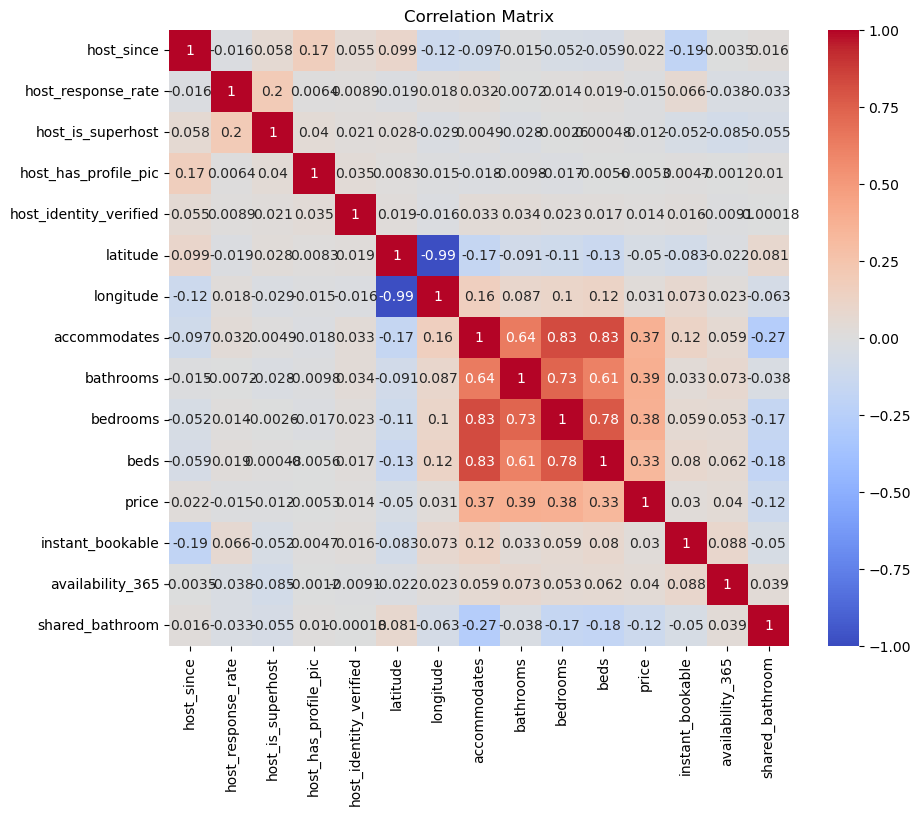

Top correlations with availability_365:
 availability_365          1.000000
instant_bookable          0.088491
bathrooms                 0.073255
beds                      0.061878
accommodates              0.058694
bedrooms                  0.053258
price                     0.040383
shared_bathroom           0.039033
longitude                 0.023370
host_has_profile_pic     -0.001180
host_since               -0.003503
host_identity_verified   -0.009090
latitude                 -0.022161
host_response_rate       -0.037578
host_is_superhost        -0.085188
Name: availability_365, dtype: float64


In [33]:
# Calculate correlation matrix
corr = dfp.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

# Correlation with the target variable
target_corr = corr['availability_365'].sort_values(ascending=False)
print("Top correlations with availability_365:\n", target_corr)